## FOOD101: feature extraction transfer learning model with 10% of data and data augmentation

In [1]:
# Get the helper function
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
# Download the 10% of the data FOOD101
# uncomment if required
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [3]:
# import the required fuctions from helper script
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
# unzip the data using function present in the helper script
#unzip_data("10_food_classes_10_percent.zip")

In [5]:
# 1. define the training train and test dir
train_dir_10_percent_1 = "10_food_classes_10_percent/train/"
test_dir_1 = "10_food_classes_10_percent/test/"

In [6]:
# 2. check the files count using the walk_through_dir from helper script
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [25]:
# 3. create the train data using the image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

IMG_SIZE = (224, 224)
train_data_10_percent_1 = image_dataset_from_directory(directory=train_dir_10_percent_1,
                                                    image_size=IMG_SIZE,
                                                    label_mode="categorical")

test_data_1 = image_dataset_from_directory(directory=test_dir_1,
                                        image_size=IMG_SIZE,
                                        label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
# 4. create data augmentation in the layer built in
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomHeight, RandomWidth, RandomZoom, RandomRotation, Rescaling

augmentation_layer_1 = Sequential([
    RandomFlip("horizontal"),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomZoom(0.2),
    RandomRotation(0.2)
    # Rescaling(1/255.) since efficientnet does have Rescaling build in base layer, therefore it is not need. Other model might this
])

In [9]:
# 5. set the fronzen base model
from tensorflow.keras.applications import EfficientNetB0
base_model_1 = EfficientNetB0(include_top=False)
base_model_1.trainable = False

In [10]:
# 6. create layers (input, hidden, output)
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense

input_shape = (224, 224, 3)

input_layer_1 = Input(shape=input_shape, name="input_layer")
data_augmentation_layer_1 = augmentation_layer_1(input_layer_1)
base_layer_1 = base_model_1(data_augmentation_layer_1, training=False)
gap_layer_1 = GlobalAveragePooling2D(name="global_average_pooling_2d_layer")(base_layer_1)
output_layer_1 = Dense(len(train_data_10_percent_1.class_names), activation="softmax", name="output_layer_1")(gap_layer_1)

model_1 = tf.keras.Model(input_layer_1, output_layer_1)

In [11]:
# 7. compile the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2d_l  (None, 1280)             0         
 ayer (GlobalAveragePooling2                                     
 D)                                                              
                                                                 
 output_layer_1 (Dense)      (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [12]:
# 8. create the model checkpoint callback
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_best_only=True,
                                                        save_weights_only=True,
                                                        verbose=1)

In [13]:
# 9. fit the model
initial_epochs = 5
history_model_1 = model_1.fit(train_data_10_percent_1,
                             epochs=initial_epochs,
                             validation_data=test_data_1,
                             validation_steps=int(0.25 * len(test_data_1)),
                             callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="10_percent_data_aug"),
                                       checkpoint_callback])


Saving TensorBoard log files to: tensorflow_hub/10_percent_data_aug/20220125-011625
Epoch 1/5


/home/jason/git_repo/tensorflow-learning/venv/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
2022-01-25 01:16:29.578385: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
2022-01-25 01:16:30.053998: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-25 01:16:30.055069: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


24/24 [==============================] - ETA: 0s - loss: 2.0258 - accuracy: 0.3200
Epoch 00001: val_loss improved from inf to 1.50850, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 546ms/step - loss: 2.0258 - accuracy: 0.3200 - val_loss: 1.5085 - val_accuracy: 0.6036
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3874 - accuracy: 0.6333
Epoch 00002: val_loss improved from 1.50850 to 1.08887, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 362ms/step - loss: 1.3874 - accuracy: 0.6333 - val_loss: 1.0889 - val_accuracy: 0.7336
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0863 - accuracy: 0.7187
Epoch 00003: val_loss improved from 1.08887 to 0.87283, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 348ms/step - loss: 1.0863 - accuracy: 0.7187 - val

In [14]:
# 10. evaluate the the model
results_10_percent_data_aug = model_1.evaluate(test_data_1)
results_10_percent_data_aug

79/79 [==============================] - 6s 72ms/step - loss: 0.7154 - accuracy: 0.8040


[0.715400218963623, 0.8040000200271606]

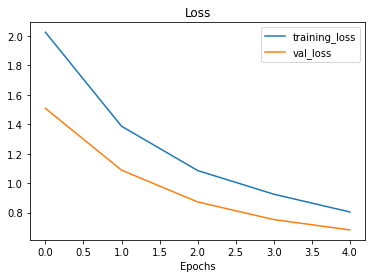

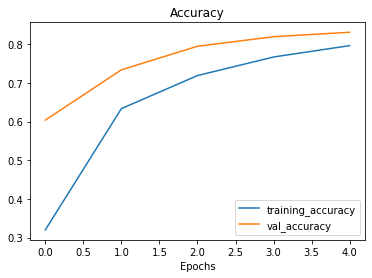

In [15]:
# 11. plot the loss curves
plot_loss_curves(history_model_1)

## Fine Tuning with data agumentation, 10 classes and 10% of data

In [16]:
# layer in the model 1
model_1.layers

In [17]:
# are layers trainable
for layer in model_1.layers:
    print(layer.name, layer.trainable)

input_layer True
sequential True
efficientnetb0 False
global_average_pooling_2d_layer True
output_layer_1 True


In [18]:
# all layers of efficientnetb0
for i, layer in enumerate(model_1.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [19]:
# # all layers of efficientnetb0
# for i, layer in enumerate(base_model_1.layers):
#     print(i, layer.name, layer.trainable)

In [20]:
# update last 10 layers of efficientnetb0 to True
base_model_1.trainable = False

for layer in base_model_1.layers[-10:]:
    layer.trainable = True

# Recompile (we have to recompile our models every time we make a change)
# when fine-tuning you typically want to lower the learning rate by 10x*
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

In [21]:
# all layers of efficientnetb0
for i, layer in enumerate(model_1.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [22]:
# trainable layers in base model
print(len(model_1.trainable_variables))

2


In [23]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5


history_fine_10_percent_data_aug = model_1.fit(train_data_10_percent_1,
                                              epochs=fine_tune_epochs,
                                              validation_data=test_data_1,
                                              validation_steps=int(0.25 * len(test_data_1)),
                                              initial_epoch=history_model_1.epoch[-1],
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: tensorflow_hub/10_percent_fine_tune_last_10/20220125-011722
Epoch 5/10
24/24 [==============================] - 12s 359ms/step - loss: 0.7539 - accuracy: 0.8080 - val_loss: 0.6661 - val_accuracy: 0.8421
Epoch 6/10
24/24 [==============================] - 7s 274ms/step - loss: 0.7370 - accuracy: 0.8080 - val_loss: 0.6551 - val_accuracy: 0.8339
Epoch 7/10
24/24 [==============================] - 6s 253ms/step - loss: 0.7318 - accuracy: 0.8147 - val_loss: 0.6594 - val_accuracy: 0.8405
Epoch 8/10
24/24 [==============================] - 6s 264ms/step - loss: 0.6980 - accuracy: 0.8280 - val_loss: 0.6694 - val_accuracy: 0.8224
Epoch 9/10
24/24 [==============================] - 7s 285ms/step - loss: 0.7020 - accuracy: 0.8253 - val_loss: 0.6457 - val_accuracy: 0.8355
Epoch 10/10
24/24 [==============================] - 7s 277ms/step - loss: 0.7194 - accuracy: 0.8120 - val_loss: 0.6502 - val_accuracy: 0.8372


In [26]:
# Evaluate the fine-tuned model
results_fine_tune_10_percent = model_1.evaluate(test_data_1)

79/79 [==============================] - 6s 71ms/step - loss: 0.6723 - accuracy: 0.8124


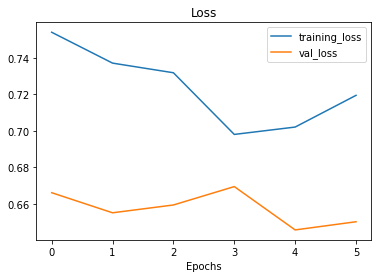

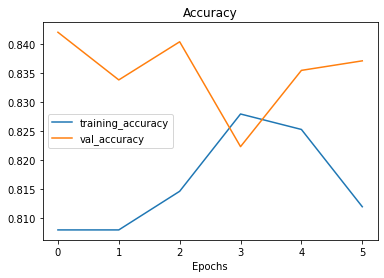

In [27]:
# Check out the loss curves of our fine-tuned model
plot_loss_curves(history_fine_10_percent_data_aug)

## Model 3: Fine-tuning and existing model on all of the data

In [28]:
# Download and unzip 10 classes of Food101 data with all images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# unzip_data("10_food_classes_all_data.zip")

--2022-01-25 01:21:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4007:81b::2010, 2404:6800:4007:81c::2010, 2404:6800:4007:81d::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4007:81b::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  2.10MB/s    in 7m 50s  

2022-01-25 01:29:45 (1.05 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [29]:
# Setup training and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [30]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [31]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
# Load weights from checkpoint, that way we can fine-tune from 
# the same stage the 10 percent data model was fine-tuned from
model_1.load_weights(checkpoint_path)

In [35]:
# Let's evaluate model_2 now
model_1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.7154 - accuracy: 0.8040


[0.7154002785682678, 0.8040000200271606]

In [38]:
# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [40]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_1.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_model_1.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                  experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220125-013238
Epoch 5/10
235/235 [==============================] - 50s 198ms/step - loss: 0.8913 - accuracy: 0.7336 - val_loss: 0.6787 - val_accuracy: 0.7944
Epoch 6/10
235/235 [==============================] - 43s 181ms/step - loss: 0.8450 - accuracy: 0.7501 - val_loss: 0.6279 - val_accuracy: 0.8240
Epoch 7/10
235/235 [==============================] - 38s 159ms/step - loss: 0.8066 - accuracy: 0.7572 - val_loss: 0.5964 - val_accuracy: 0.8388
Epoch 8/10
235/235 [==============================] - 37s 159ms/step - loss: 0.7720 - accuracy: 0.7668 - val_loss: 0.5801 - val_accuracy: 0.8405
Epoch 9/10
235/235 [==============================] - 35s 147ms/step - loss: 0.7447 - accuracy: 0.7756 - val_loss: 0.5427 - val_accuracy: 0.8487
Epoch 10/10
235/235 [==============================] - 35s 147ms/step - loss: 0.7266 - accuracy: 0.7763 - val_loss: 0.5145 - val_accuracy: 0.8553


In [42]:
# Let's evaluate on all of the test data
results_fine_tune_full_data = model_1.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 5s 68ms/step - loss: 0.4900 - accuracy: 0.8584


[0.4899701178073883, 0.8583999872207642]